### Student Information
Name:WENG,YU-CHU

Student ID:G13230105

GitHub ID:Githhmax

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [ ]:
### Begin Assignment Here
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display
import plotly as py
import helpers.data_mining_helpers as dmh
import math
import nltk
nltk.download("punkt")
## 1. Data Preparation
#  1-1. Load the Dataset
path = 'newdataset/Reddit-stock-sentiment.csv'  # newdataset
df = pd.read_csv(path)
display(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aqoo925925\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [124]:
# Exercise 2  Answer 
# 1-2. Filter the data using the .isin() method to keep only records with sentiment labels 1.0, 0.0, and -1.0
df = df[df['label'].isin([1.0, 0.0, -1.0])]
# 1-3. Select columns (text, label)
categories = df[['text', 'label']].copy()

In [125]:
# 2-1. Check for missing values
df.isnull().apply(lambda x: dmh.check_missing_values(x))
categories.isnull().sum()


text     0
label    0
dtype: int64

In [126]:
# 2-2. Check for duplicate values
sum(categories.duplicated())
print(categories) 

                                                  text  label
0                                     Calls on retards   -1.0
1    Stunt as in like why did they even make a big ...    0.0
2                    Seeing lots of red in the ticker.    0.0
3    Vision Marine Technologies Inc. is rewriting t...    1.0
4                             He didn’t say thank you.   -1.0
..                                                 ...    ...
842        Invest now it is going to shoot up tomorrow    1.0
843                             Where can I read this?    0.0
844  Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...    0.0
845  i sold my puts so i expect cheeto to declare w...   -1.0
846                       ![img](emote|t5_2th52|31224)    0.0

[847 rows x 2 columns]


In [127]:
# 3-1. Text Processing (using nltk)
# Add the 'unigrams' column using .loc to avoid the warning
categories.loc[:,'unigrams'] = categories['text'].apply(lambda x: dmh.tokenize_text(x))
categories.loc[0:3,'unigrams']


0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [129]:
# 3-2 To check if the DataFrame columns are correct (text , label ,unogtams)
categories[0:3]  

,text,label,unigrams
0,Calls on retards,-1.0,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"


In [ ]:
# 4. Text Vectorization
count_vect = CountVectorizer()
count_vect.fit(categories.text) # Learn the vocabulary (fit)
categories_counts = count_vect.transform(categories.text) # transform

print(categories_counts[55])



<Axes: title={'center': 'Category Distribution'}, xlabel='label'>

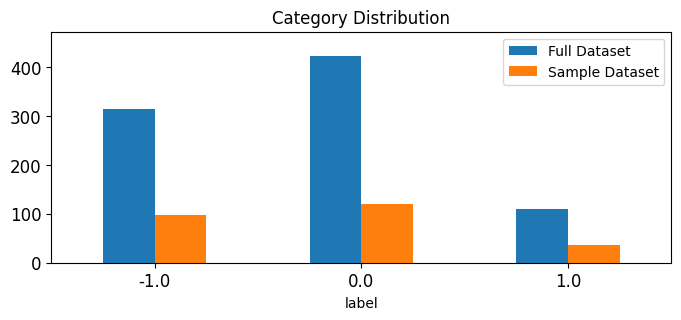

In [176]:
# 5. Visualization
# Exercise 8 Answer
# 5-1. Check whether the subset (sample) drawn from the dataset has a similar distribution of sentiment labels as the entire dataset. 
categories_sample = categories.sample(frac=0.3, random_state=42) # Sample 30% of the original dataset categories as a subset

X_counts = categories['label'].value_counts().sort_index()  # Count the number of each sentiment label in the entire dataset and sort by label
X_sample_counts = categories_sample['label'].value_counts().sort_index() # Count the number of each sentiment label in the sampled subset and sort by label

df_counts = pd.DataFrame({
    'Full Dataset': X_counts,
    'Sample Dataset': X_sample_counts
}).reindex(X_counts.index.union(X_sample_counts.index), fill_value=0)

df_counts.plot(kind='bar',
               title='Category Distribution',
               ylim=[0, df_counts.values.max() + 50],
               rot=0,
               fontsize=12,
               figsize=(8,3))



In [156]:
analyze = count_vect.build_analyzer()
analyze(categories.text[6])

['trump',
 'will',
 'respond',
 'to',
 'china',
 'increasing',
 'their',
 'tariffs',
 'trump',
 'is',
 'looking',
 'to',
 'fire',
 'jerome',
 'powell',
 'earnings',
 'reporting',
 'is',
 'starting',
 'personally',
 'think',
 'the',
 'next',
 'few',
 'weeks',
 'are',
 'going',
 'to',
 'be',
 'brutal',
 'if',
 'all',
 'companies',
 'adjust',
 'downwards',
 'and',
 'jpow',
 'is',
 'fired',
 'can',
 'see',
 'it',
 'going',
 'down',
 'lot',
 'and',
 'very',
 'quickly',
 'even']

In [142]:
### 5-2. Text Vectorization: Vocabulary Mapping Inspection
#  Exercise 10 (take home):
count_vect = CountVectorizer()
# Get the vocabulary
categories_counts= count_vect.fit_transform(categories.text) 
# Find the non-'00' words in the 5th record
vocab = count_vect.get_feature_names_out()  
words = [vocab[i] for i in categories_counts[4].nonzero()[1] if vocab[i] != '00']
print("Other word(s) in record 5:", words)

Other word(s) in record 5: ['he', 'didn', 'say', 'thank', 'you']


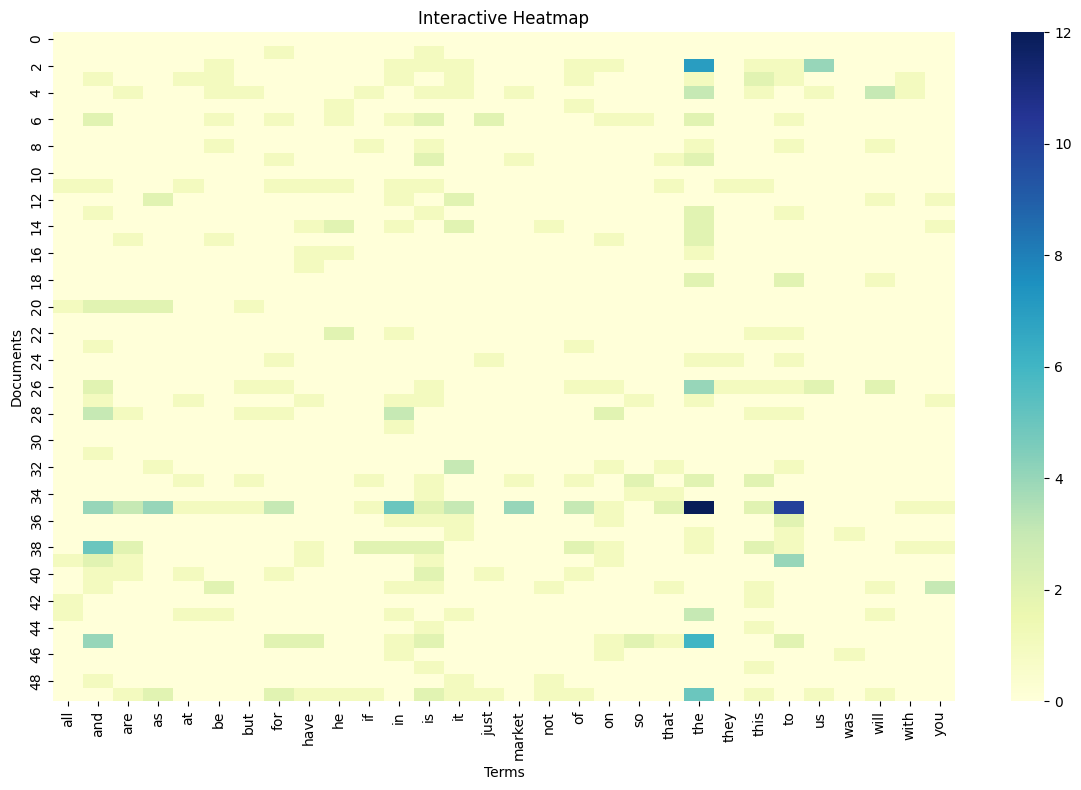

In [ ]:
# 5-3. Plotting a heatmap
# Exercise 11 (take home)

df_heatmap = pd.DataFrame(X_sample, columns=vectorizer.get_feature_names_out())

fig = plt.subplots(figsize=(12, 8))
sns.heatmap(df_heatmap,
            cmap="YlGnBu",        
            cbar=True,            
            annot=False,          
            linewidths=0,         
            )                
plt.title("Interactive Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()

In [175]:
# 5-4 Plotting a heatmap(By plotly)
import plotly.express as px

df_heatmap = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

fig = px.imshow(df_heatmap.values,
                labels=dict(x="Terms", y="Documents", color="Frequency"),
                x=df_heatmap.columns,
                y=df_heatmap.index,
                color_continuous_scale='PuRd',
                aspect="auto")

fig.update_layout(title="Interactive Heatmap ")


In [ ]:
### 5-5. Effectively reduce the number of terms to lower computational load
#Exercise 13 answer: 
# Vectorization: Select the Top 30 Most Frequent Words
vectorizer = CountVectorizer(max_features=30)
X_counts = vectorizer.fit_transform(categories['text'])

# Randomly sample 50 documents
sample_indices = np.random.choice(X_counts.shape[0], 50, replace=False)
X_sample = X_counts[sample_indices].toarray()

df_heatmap = pd.DataFrame(X_sample, columns=vectorizer.get_feature_names_out())

fig = px.imshow(df_heatmap.values,
                labels=dict(x="Terms", y="Documents", color="Frequency"),
                x=df_heatmap.columns,
                y=df_heatmap.index,
                color_continuous_scale='PuRd',
                aspect="auto")

fig.update_layout(title="Top 30 Words in 50 Sample Documents (Term Frequency ")             


In [190]:
### 5-6 Term frequency analysis and visualizing the results as a bar chart sorted by frequency
### Exercise 14 answer:
# Calculate the total frequency of each term
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()  
terms = vectorizer.get_feature_names_out()

# Create a DataFrame with terms and their frequencies
df_terms = pd.DataFrame({'Term': terms, 'Frequency': term_frequencies})

# Sort by frequency in descending order
df_terms = df_terms.sort_values(by='Frequency', ascending=False)

fig = px.bar(df_terms,
             x='Term',
             y='Frequency',
             title='Top 30 Terms Sorted by Frequency (Long Tail Effect)',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             color='Frequency',  # Color is distinguished by frequency
             color_continuous_scale='YlGnBu')

fig.update_layout(xaxis_tickangle=-45,  
                  title="Long Tail Distribution of Terms by Frequency")




C:\Users\aqoo925925\AppData\Local\Temp\ipykernel_7236\1378316078.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



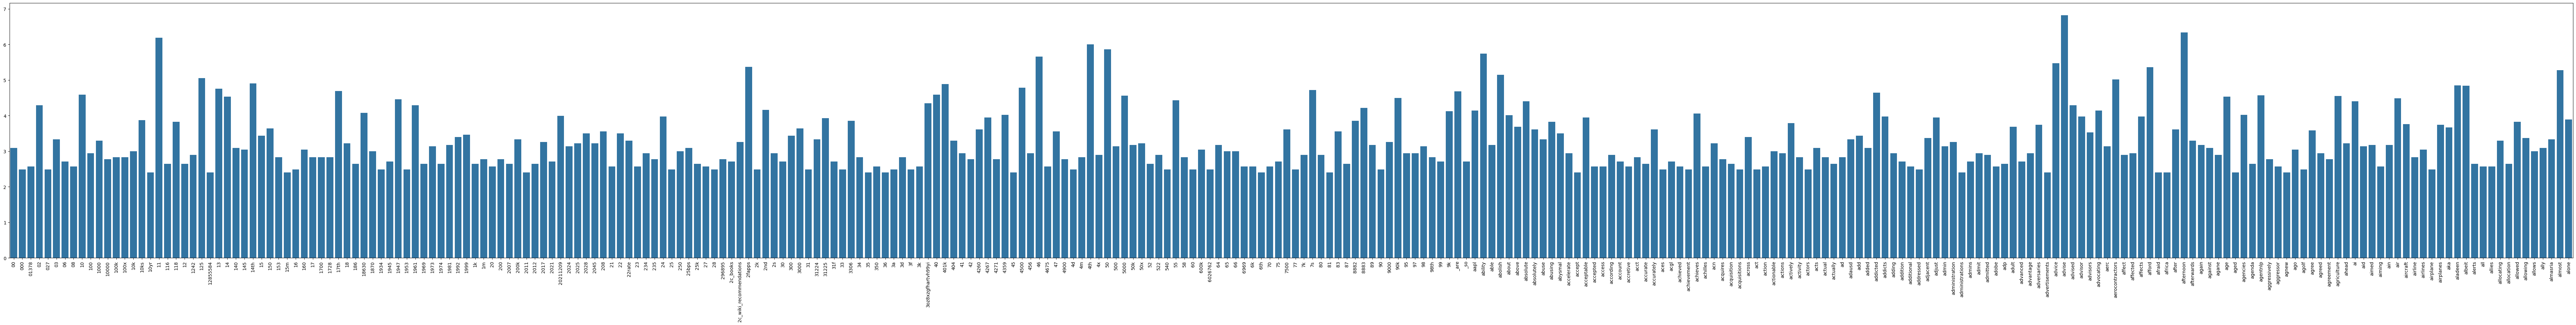

In [195]:
### 5-7 Plot a bar chart showing the logarithmic frequency of the top 300 words
### Exercise 15 answer
import math
import numpy as np
vectorizer = CountVectorizer(max_features=300)  # Set to select only the top 300 words
X_counts = vectorizer.fit_transform(categories['text'])  
# Calculate the total frequency of each word
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()

term_frequencies_log = [math.log(i + 1) for i in term_frequencies]
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Phase 2

In [ ]:
### Begin Assignment Here